<a href="https://colab.research.google.com/github/Manuel-FA/Deep_Learning/blob/main/Digits%20Recognition%20-%20Dataset_1%20-%20Version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#000080B">**ABSTRACT**</font>

*   A model was trained to recognize digits, at the end a test is made
*   Model: Convolutional neural network
*   Libraries used: Numpy, Pandas, MatPlotLib, Seaborn, Scikitplot, Tensorflow and Keras

# <font color="#000080B">**1. Introduction**</font>
---



## <font color="#000080B">**1.1. Content**</font>


    1. Introduction
      1.1. Content
      1.2. Problem statement
    2. Project preparation
      2.1. Libraries import
      2.2. Data import
    3. Exploratory data analysis
    4. Data preprocessing
    5. Modeling
      5.1. Dataset preparation
      5.2. Create hidden layer
      5.3. Training and validation
    6. Predict
      6.1. Data preprocessing
      6.2. Compute
      6.3. Demostration

## <font color="#000080B">**1.2. Problem statement**</font>

Image recognition is a fundamental task in the field of deep learning that has revolutionized numerous applications across various industries. The ability of machines to understand and classify images accurately and efficiently has led to the development of innovative technologies in areas such as healthcare, security, automotive, and entertainment. Specifically, digit recognition has been one of the key challenges in this field as it serves as the foundation for more complex applications such as handwritten text recognition, character detection in images, and visual data analysis.

Digit recognition holds great significance due to its wide range of applications in everyday life. For instance, in the banking sector, automatic check classification and signature authentication rely on the ability to recognize handwritten digits. In the manufacturing industry, identification of serial numbers and automatic barcode reading also heavily depend on precise digit recognition. Furthermore, in the academic realm, analyzing large datasets of digit images can provide valuable insights for scientific research and statistical analysis.




# <font color="#000080B">**2. Project preparation**</font>

---



## <font color="#000080B">**2.1. Libraries import**</font>

In [ ]:
# data import
from google.colab import files

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# model
import tensorflow
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k


## <font color="#000080B">**2.2. Data import**</font>

In [ ]:
uploaded = files.upload()

In [ ]:
df = pd.read_csv('/content/train.csv').astype('float32')

# <font color="#000080B">**3. Exploratory data analysis**</font>
---



Exploratory analysis can help identify patterns, trends, and potential problems in data, as well as select relevant features and perform necessary transformations before feeding the data into deep learning models. This ensures that the data is in a state suitable for training and allows for better results in the final model.

In [ ]:
# shows what is in the dataframe
print(df.head(10))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6    7.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7    3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8    5.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9    3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0

In [ ]:
print('Data shape:', df.shape)

print('Number of Duplicates:', len(df[df.duplicated()]))

print('Number of Missing Values:', df.isnull().sum().sum())

print('Count of Features per Data Type:')
df.dtypes.value_counts()

Data shape: (42000, 785)
Number of Duplicates: 0
Number of Missing Values: 0
Count of Features per Data Type:


float32    785
dtype: int64

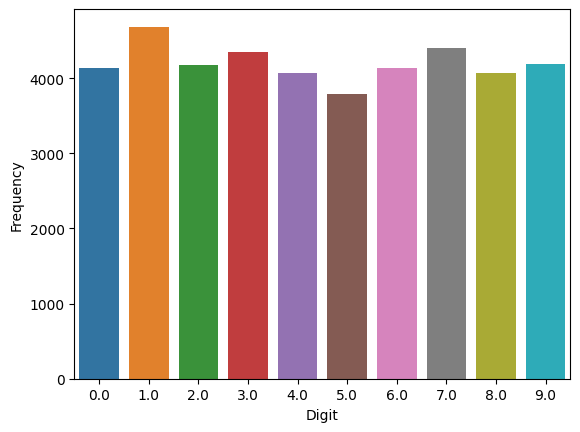

In [ ]:
# frequency per digit
sns.countplot(data=df, x="label")
plt.ylabel("Frequency")
plt.xlabel("Digit")
plt.show()

In [ ]:
X = df.drop('label',axis = 1)
y = df['label']

# <font color="#000080B">**4. Data preprocessing**</font>
---



Data preprocessing refers to the transformations and manipulations applied to data to prepare it for use in a deep learning model. This implies tasks such as data cleaning, normalization, coding of categorical variables, handling of missing values, selection of relevant features, division of training and test sets, among others. The primary goal of data preprocessing is to ensure that the data is consistent, properly formatted, and suitable for feeding the deep learning model.

To apply a convolutional neural network (CNN) model, the data needs to be in a three-dimensional format, where the first dimension represents the number of samples, the next two dimensions represent the height and width of the image, while the second dimension represents the image width and height. final is the color channel.

In [ ]:
X.shape

(42000, 784)

In [ ]:
X = np.reshape(X.values, (X.shape[0], 28,28))
X = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)

In [ ]:
X.shape

(42000, 28, 28, 1)

Después de aplicar to_categorical, la variable train_yOHE contendrá la representación one-hot de las etiquetas de clase, donde cada etiqueta será un vector binario de longitud 10.

In [ ]:
y

0        1.0
1        0.0
2        1.0
3        4.0
4        0.0
        ... 
41995    0.0
41996    1.0
41997    7.0
41998    6.0
41999    9.0
Name: label, Length: 42000, dtype: float32

In [ ]:
y_OHE = to_categorical(y, num_classes = 10, dtype='int')
y_OHE

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
y_OHE_df = pd.DataFrame(y_OHE)
y_OHE_df

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


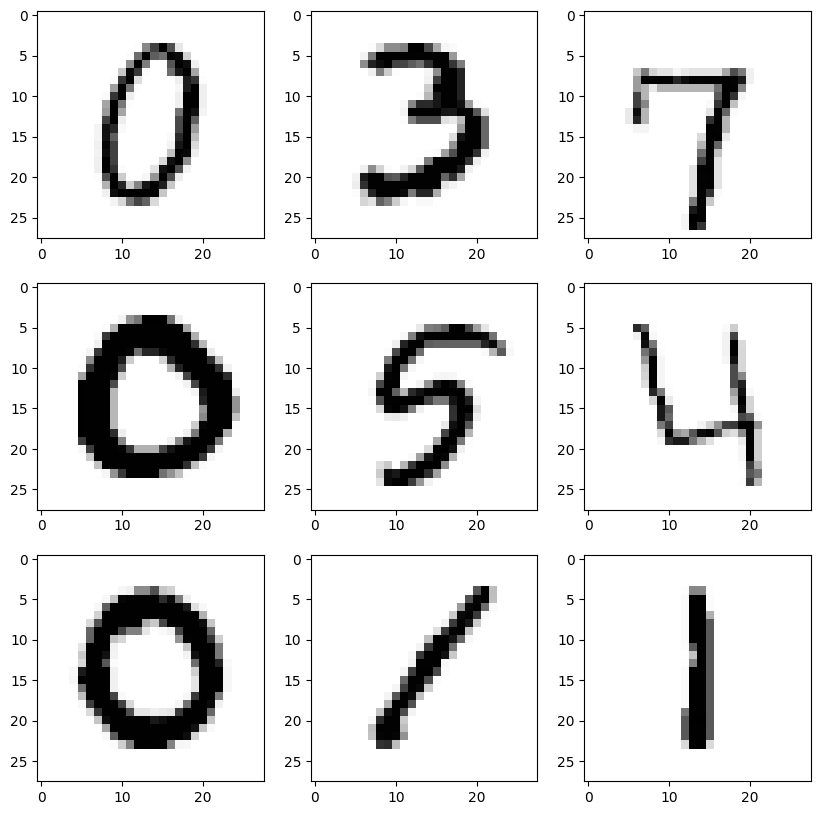

In [ ]:
shuff = shuffle(X[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

# <font color="#000080B">**5. Modeling**</font>

---



Process of building a statistical or mathematical model that captures the underlying relationships and patterns in data. Modeling involves selecting an appropriate machine learning algorithm or technique, tuning model parameters, and training the model using training data so that it can make predictions or decisions on new or previously unseen data.

## <font color="#000080B">**5.1. Dataset preparation**</font>

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y_OHE, test_size = 0.2)

## <font color="#000080B">**5.2. Create hidden layer**</font>

In [ ]:
model = tensorflow.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
#number of node
model.add(Dense(128,activation ="relu"))
#number of classes
model.add(Dense(10,activation ="softmax"))

## <font color="#000080B">**5.3. Training and validation**</font>

In [ ]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10,  validation_data = (X_val,y_val))

Epoch 1/10
1050/1050 [==============================] - 54s 49ms/step - loss: 0.2915 - accuracy: 0.9286 - val_loss: 0.1132 - val_accuracy: 0.9689
Epoch 2/10
1050/1050 [==============================] - 56s 53ms/step - loss: 0.0679 - accuracy: 0.9784 - val_loss: 0.0786 - val_accuracy: 0.9780
Epoch 3/10
1050/1050 [==============================] - 53s 51ms/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.0699 - val_accuracy: 0.9793
Epoch 4/10
1050/1050 [==============================] - 51s 49ms/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0893 - val_accuracy: 0.9764
Epoch 5/10
1050/1050 [==============================] - 51s 48ms/step - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0577 - val_accuracy: 0.9860
Epoch 6/10
1050/1050 [==============================] - 51s 49ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.1223 - val_accuracy: 0.9688
Epoch 7/10
1050/1050 [==============================] - 52s 50ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0676 -

# <font color="#000080B">**6. Prediction**</font>

---



## <font color="#000080B">**6.1. Data preprocessing**</font>

In [ ]:
df = pd.read_csv('/content/test.csv').astype('float32')
df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test = np.reshape(df.values, (df.shape[0], 28,28))
X_test.shape

(28000, 28, 28)

In [ ]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_test.shape

(28000, 28, 28, 1)

## <font color="#000080B">**6.2. Compute**</font>

In [ ]:
predictions = model.predict(X_test)

875/875 [==============================] - 11s 12ms/step


## <font color="#000080B">**6.2. Demonstration**</font>

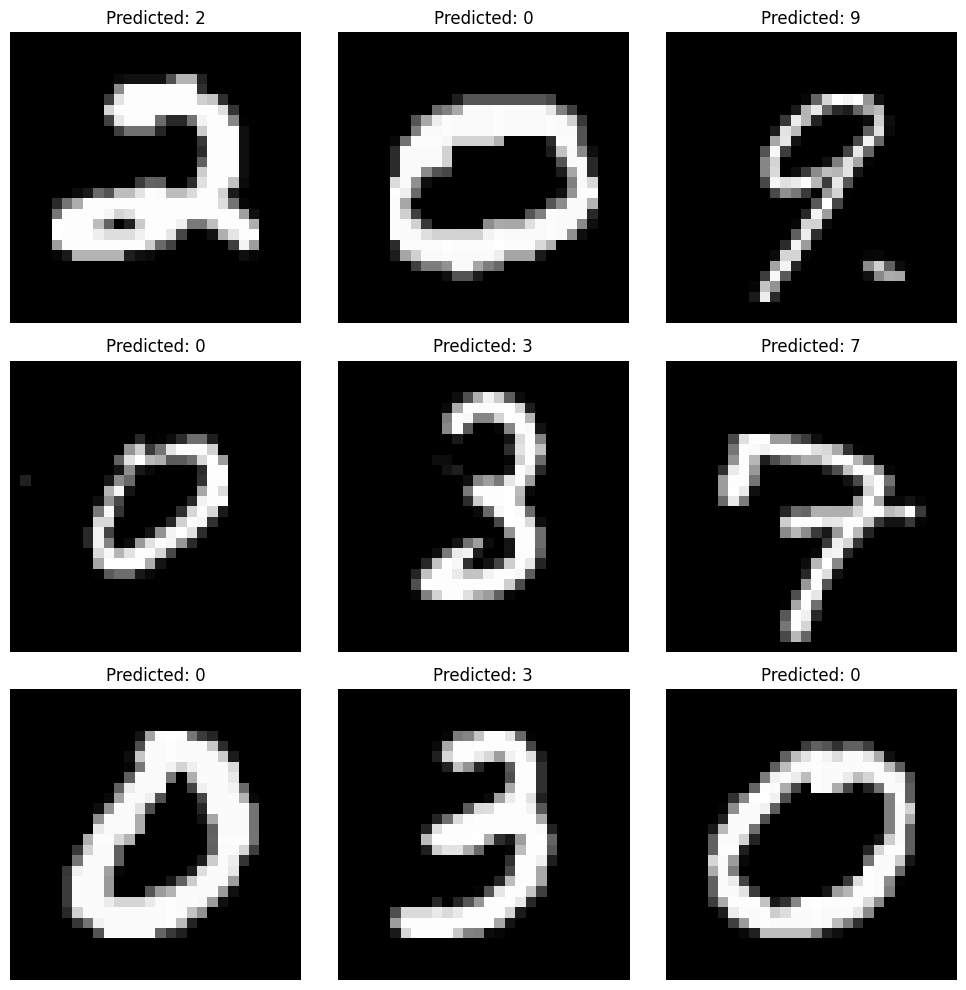

In [ ]:
shuff = shuffle(X_test[:10])

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    # Get the predicted label with the highest probability
    predicted_label = np.argmax(predictions[i])

    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Predicted: {}'.format(predicted_label))

plt.tight_layout()
plt.show()